# Redes Neuronales Recurrentes

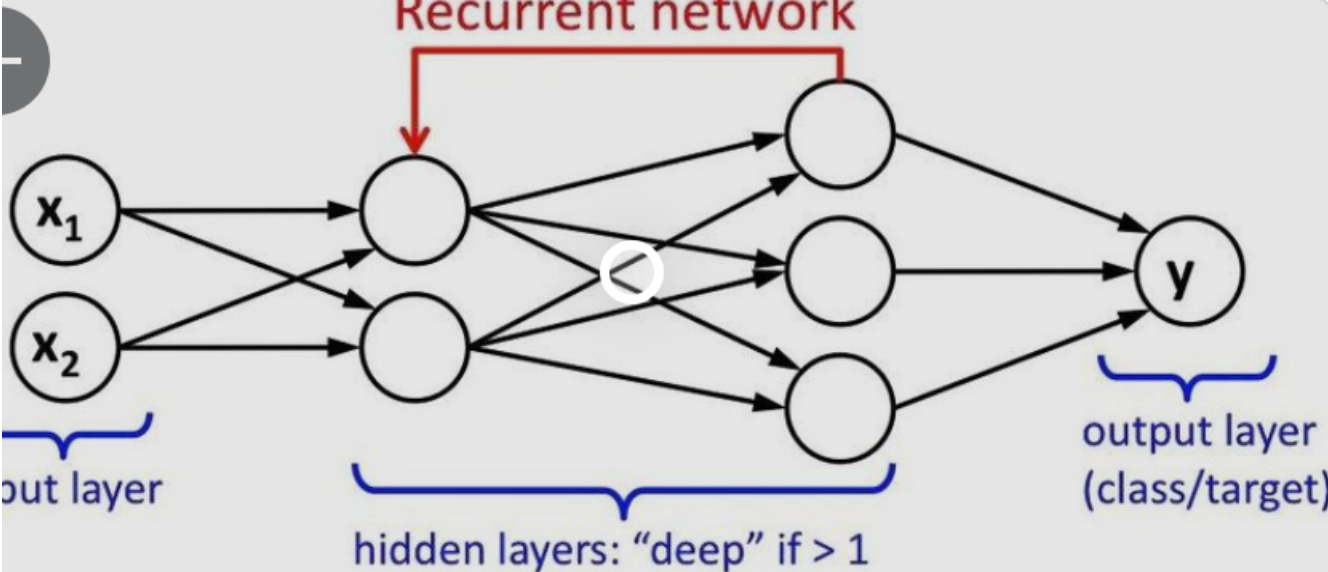

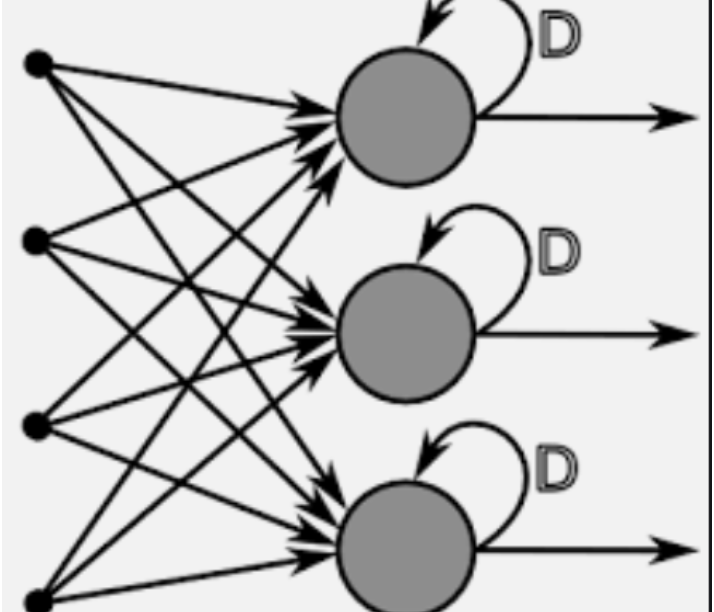

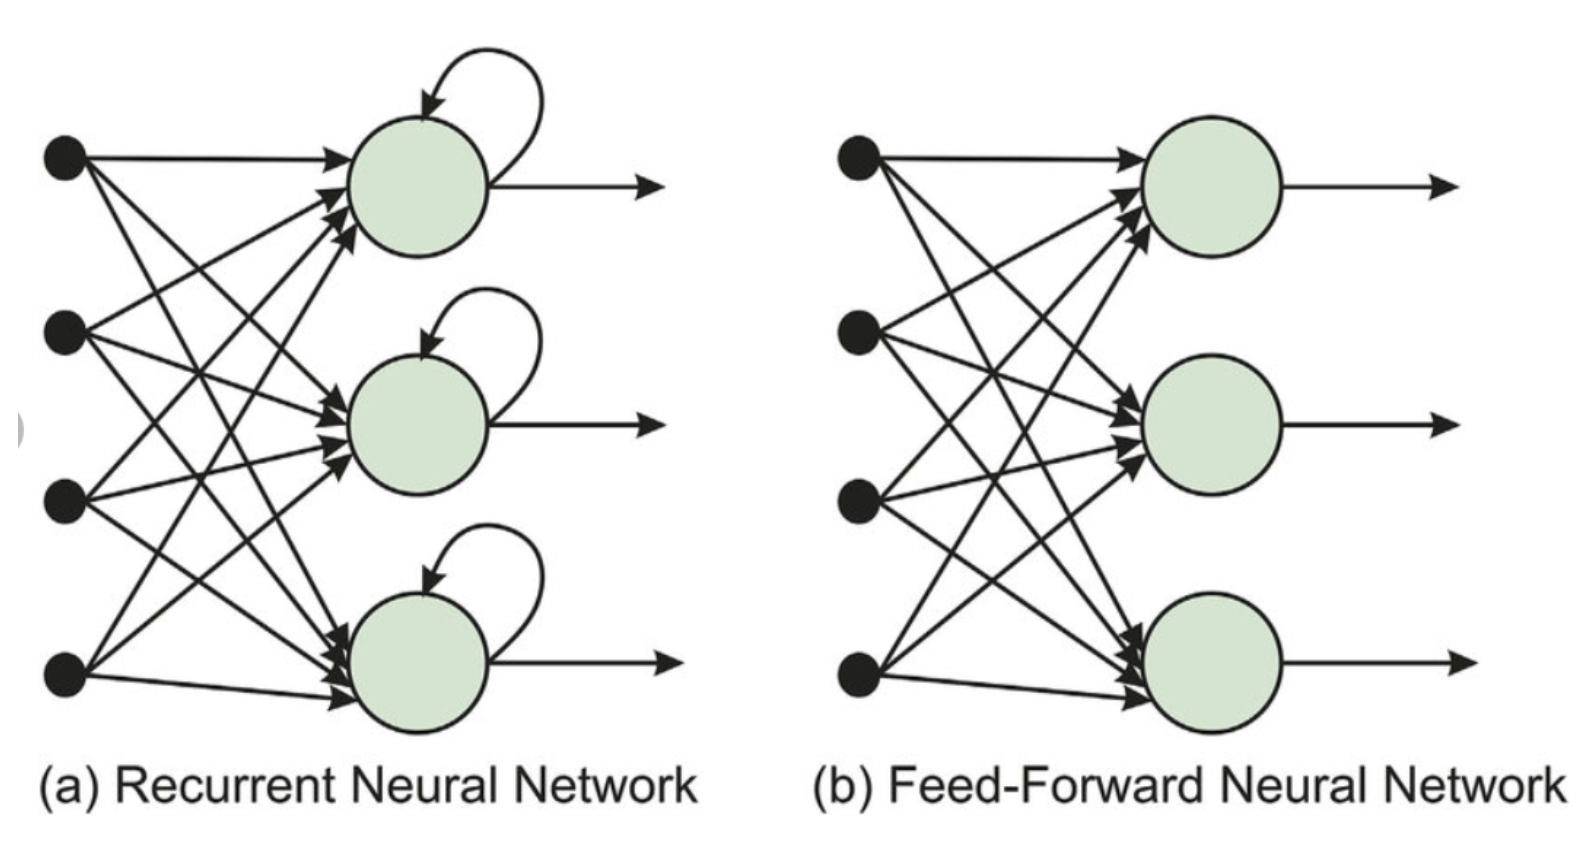

Otro tipo de redes neuronales que ha estado dominando problemas díficiles de ML que involucran **SECUENCIAS** de inputs son las llamadas Redes Neuronal Recurrentes (RNN). 

RNN tiene conexiones que que tienen **LOOPS**, agregan *feedback* y memoria a la Red en el Tiempo. Esta memoria le permite a este tipo de Red aprender y generalizar a lo largo de secuenas de inputs en lugar de patrones individuales. Por ejemplo, se puede pensar como una Feed-Forwad con loops, para cada capa, cada neurona podría psar su señal hacia los lados, así como hacia delante. El output de la Red puede alimentar el Input de la Siguiente Red con el siguiente vector input. 

Las conexiones recurrentes agregan memoria a la red que le permite aprender abstracciones más complicadas de la secuencia de inputs. 

Una poderosa RNN es Long Short-Term Memory Network (LSTM) que ha probado ser efectiva cuando se realiza en configuraciones profundas, alcanzando resultados State-of-the-Art en una diversidad de problemas desde traducciones de lenguajes hasta Series de Tiempo. 

¿por qué es bueno involucrar una secuencia como input o output?

Por ejemplo, un problema univariado de series de tiempo: el precio de una acción en el tiempo. Se puede usar una Feed-Forward con una ventana de 5 días, por ejemplo, y hacer un pronóstico para el sexto día. Pero esto es muy limitado. la ventana agrega algo de memoria al problema pero es es limitado porque el número es fijo y los puntos debería conocerse lo suficiente para que se pueda generalizar. Una ventana así de ingenua no capturaría tendencias sobre muchos minutos, horas, días relevantes para el problema. Además de una predicción a la otra la Red seguiría conociendo sólo 5 puntos. 

Además de Series de Tiempo también hay otros tipo de problemas: 
1. Uno a Varios: output secuencial, para leyendas de imágenes
2. Varios a Uno: Input secuencia, para análisis de sentimiento, serie de tiempo, etc
3. Varios a Varios: Secuencial In y Out, traducciones
4. Varios a Varios a Sincronizadso: Secuencias sincorinizadas In y Out, clasificación de videos

Los que hemos hecho hasta el momento han sido 
1. Uno a Uno: Clásico ejemplo de Input Output de una Feed-Forward como Clasificaicón de Imágenes. 

Hay 2 problemas que deben ser atendidos para aplicar estas redes a problemas reales: 
1. Cómo entrenar Red con Backpropagation. Backpropagation se usa en Feed-Forward pero RNN se rompe por las conexiones en loops. Se propuso una modificación llamada **Backpropagation a través del tiempo**. En lugar de tomar la red neuronal tal como es, su estructura se **desplega/desenvuelve**, donde se generan copias de las neuronas que tienen conexiones recurrentes. Por ejemplo, una neurona con una conexión a sí misma (A->A) y hacia delante, se representaría como dos neuronas con los mismos pesos (A->B). Esto permite que gráficas cíclicas de una red recurrente se conviertan en una gráfica sin ciclos, estilo Feed-Forward y luego puede ser aplicado Backpropagation. 


2. Cómo controlar que los gradientes no desaparezacan o exploten. Cuando se hace el backpropagation en estructuras desplegada, los gradientes que se calculan para actualizar los pesos se pueden volver inestables. Es decir, se puden convertir en número muy grandes que signican que el grandiente explota o muy pequeños que desparece. Si se utilizan estos gradientes lo pesos se hacen inestables. En RNN este se soluciona con una Arquitectura llamada Long Short-Term Memory Network que permite que las RNN sean entrenadas.

# Long Short-Term Memory Network (LSTM)

LSTM es una RNN que es entrenada usando Backpropagation Through Time y supera el problema del gradiente que desaparece. En lugar de neuronas el LSTM tiene bloques de memoria que se conectan en capas. Un bloque tiene componentes que la hacen más "lista" que clásicas neurona y una memoria para secuencias recientes. Un bloque contiene puertas que administran el estado del bloque y su output. Una unidad opera a través de una secuencia de inputs y cada puerta dentro del bloque usa una función sigmoidal para controlar si son "disparadas" o no, haciendo el cambio en el bloque y si la información viaja o no. 

Hay 3 tipos de puertas dentro de una unidad de memoria: 

- Puerta de Olvido: Condicionalmente decide qué información descartar
- Puerta Input: "" qué valores del input actualizarán el estado de memoria
- Puerta Output: "" que outputs se tendrán basados en el input y la memoria. 

Cada puerta tiene pesos que se aprenden durante el proceso. 

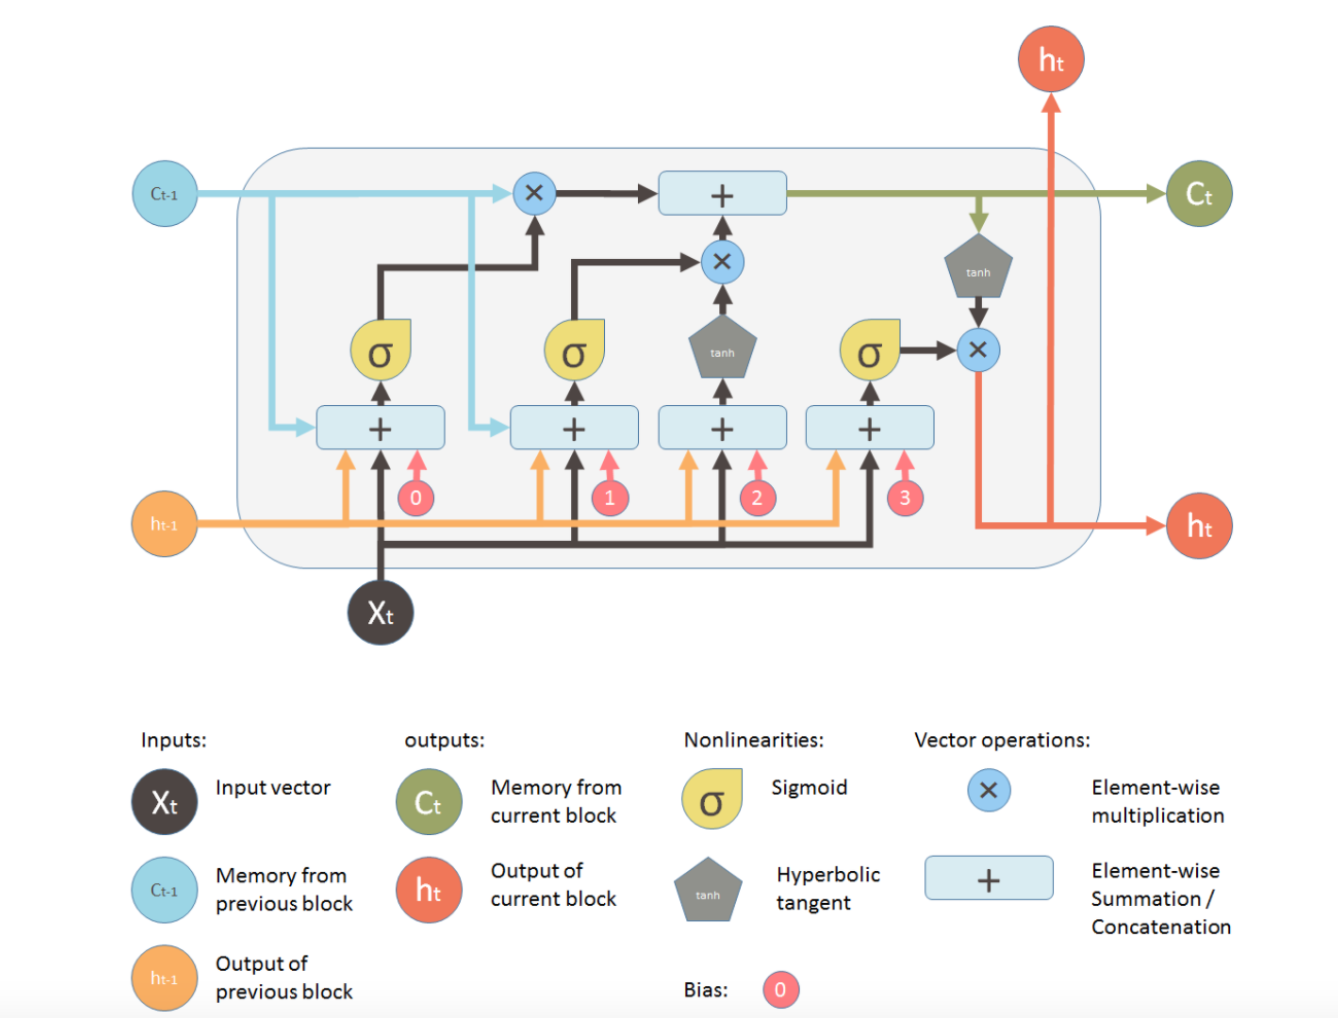

# Serie de Tiempo usando LSTM

In [1]:
#tipo de cambio
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM #NOVEDAD
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas_datareader.data as web


In [2]:
#Nos traemos el Tipo de Cambio
idx_tickers2=["USDMXN=X"]
fx=web.DataReader(idx_tickers2,"yahoo",start="1900-01-01")

In [3]:
fx

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,USDMXN=X,USDMXN=X,USDMXN=X,USDMXN=X,USDMXN=X,USDMXN=X
Date,,,,,,
2003-12-01,11.358000,11.358000,11.425000,11.177600,11.177600,0.0
2003-12-02,11.290000,11.290000,11.380000,11.274000,11.360500,0.0
2003-12-03,11.245000,11.245000,11.360500,11.186000,11.360500,0.0
2003-12-04,11.188000,11.188000,11.355000,11.159000,11.355000,0.0
2003-12-05,11.197000,11.197000,11.240000,11.123000,11.186000,0.0
...,...,...,...,...,...,...
2022-08-18,20.130159,20.130159,20.263830,20.117001,20.130159,0.0
2022-08-21,20.189051,20.189051,20.236521,20.134800,20.189051,0.0


In [4]:
fx=fx.loc[:,("Adj Close")]

In [5]:
fx

Symbols,USDMXN=X
Date,
2003-12-01,11.358000
2003-12-02,11.290000
2003-12-03,11.245000
2003-12-04,11.188000
2003-12-05,11.197000
...,...
2022-08-18,20.130159
2022-08-21,20.189051
2022-08-22,20.126900


<AxesSubplot:xlabel='Date'>

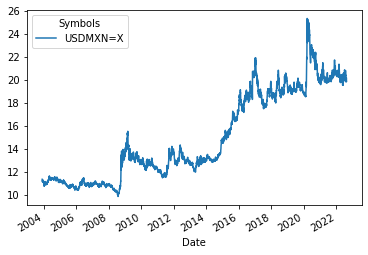

In [6]:
fx.plot()

In [7]:
data=fx

In [8]:
dataset=fx
dataset=dataset.values.astype("float32")
dataset[:5,:]

array([[11.358],
       [11.29 ],
       [11.245],
       [11.188],
       [11.197]], dtype=float32)

In [9]:
dataset[-5:,:]

array([[20.13016],
       [20.18905],
       [20.1269 ],
       [19.98368],
       [19.8796 ]], dtype=float32)

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(dataset)
dataset[-5:,]

array([[0.6634685 ],
       [0.6672754 ],
       [0.66325784],
       [0.6539998 ],
       [0.64727175]], dtype=float32)

In [11]:
data.tail(5)

Symbols,USDMXN=X
Date,
2022-08-18,20.130159
2022-08-21,20.189051
2022-08-22,20.126900
2022-08-23,19.983681
2022-08-25,19.879601


In [ ]:
#Vamos a crear una función 
#look_back=1
X=t-1         Y=t
19.983681   19.879601
20.126900   19.983681
20.189051   20.126900
20.130159   20.189051

In [13]:
dataset

array([[0.09641427],
       [0.0920186 ],
       [0.08910972],
       ...,
       [0.66325784],
       [0.6539998 ],
       [0.64727175]], dtype=float32)

In [15]:
#Tenemos que ver cómo nuestro modelo se desempeña fuera de la muestra,
#para clasificación o regresión usamos validación cruzada. 
#En series de tiempo la secuencia de los valores es importante. 
#Un simple método. 
#es separar nuestro data en forma ordenadas y en el train y test
#Separamos 2/3 partes en train y 1/3 en test
train_size=int(len(dataset)*.67)
test_size=len(dataset)-train_size
train,test=dataset[0:train_size,:],dataset[train_size:len(dataset),:]
print(len(train),len(test))

3270 1611


In [ ]:
#Vamos a crear una función 
#look_back=1
X=t-1         Y=t
19.983681   19.879601
20.126900   19.983681
20.189051   20.126900
20.130159   20.189051

In [16]:
#definimos función que lo único que hace es generar columnas 
#como la celda de arriba
def create_dataset(dataset,look_back=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX), np.array(dataY)



In [17]:
look_back=1
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)

In [18]:
train[-5:] #originales

array([[0.5837424 ],
       [0.58443093],
       [0.57999885],
       [0.56653905],
       [0.5666529 ]], dtype=float32)

In [19]:
trainX[-5:] #en t-1

array([[0.57980883],
       [0.585286  ],
       [0.5837424 ],
       [0.58443093],
       [0.57999885]], dtype=float32)

In [20]:
trainY[-5:] #en t

array([0.585286  , 0.5837424 , 0.58443093, 0.57999885, 0.56653905],
      dtype=float32)

In [21]:
data.tail(5)

Symbols,USDMXN=X
Date,
2022-08-18,20.130159
2022-08-21,20.189051
2022-08-22,20.126900
2022-08-23,19.983681
2022-08-25,19.879601


In [ ]:
#look_back2
X=t-2         X=t-1         Y=t
20.126900 19.983681 19.879601
20.189051 20.126900 19.983681
20.130159 20.189051 20.126900

In [22]:
look_back=2
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)

In [23]:
train[-5:]

array([[0.5837424 ],
       [0.58443093],
       [0.57999885],
       [0.56653905],
       [0.5666529 ]], dtype=float32)

In [24]:
trainX[-5:,] #dos columnas, que es t-1 y t-2

array([[0.566435  , 0.57980883],
       [0.57980883, 0.585286  ],
       [0.585286  , 0.5837424 ],
       [0.5837424 , 0.58443093],
       [0.58443093, 0.57999885]], dtype=float32)

In [25]:
trainY[-5:]

array([0.585286  , 0.5837424 , 0.58443093, 0.57999885, 0.56653905],
      dtype=float32)

In [26]:
trainX.shape

(3267, 2)

In [27]:
trainX.shape[0]

3267

In [28]:
trainX.shape[1]

2

In [29]:
#reshape input sea [samples,time steps,features]
#aquí le estamos dicindo que tiene 2 columnas/features para pronosticas
trainX=np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX=np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [30]:
trainX.shape

(3267, 1, 2)

In [31]:
trainX

array([[[0.09641427, 0.0920186 ]],

       [[0.0920186 , 0.08910972]],

       [[0.08910972, 0.08542508]],

       ...,

       [[0.585286  , 0.5837424 ]],

       [[0.5837424 , 0.58443093]],

       [[0.58443093, 0.57999885]]], dtype=float32)

# Modelo de LSTM

-Una capa input con un input

-Una oculta con 4 LSTM bloques

-Una capa output con una predicción

-Función de Activación Sigmoidal para LSTM

-100 epchs y batch size de 1 (online)

-Loss como es regresión sería MSE

-Optimizador: Adam

In [32]:
len(trainX)

3267

In [33]:
look_back

2

In [34]:
trainX.shape

(3267, 1, 2)

In [35]:
trainX[1]

array([[0.0920186 , 0.08910972]], dtype=float32)

In [38]:
model=Sequential()
model.add(LSTM(4,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
#le estamos dando las últimas look_back=2 (últimsa dos observaciones) #y que pronostique hoy
model.fit(trainX,trainY,epochs=25,batch_size=1,verbose=2)

Epoch 1/25
3267/3267 - 14s - loss: 0.0022
Epoch 2/25
3267/3267 - 9s - loss: 6.1503e-05
Epoch 3/25
3267/3267 - 10s - loss: 6.3294e-05
Epoch 4/25
3267/3267 - 10s - loss: 6.1571e-05
Epoch 5/25
3267/3267 - 10s - loss: 6.2213e-05
Epoch 6/25
3267/3267 - 12s - loss: 6.0186e-05
Epoch 7/25
3267/3267 - 10s - loss: 5.9919e-05
Epoch 8/25
3267/3267 - 10s - loss: 5.9950e-05
Epoch 9/25
3267/3267 - 10s - loss: 5.9383e-05
Epoch 10/25
3267/3267 - 10s - loss: 5.9138e-05
Epoch 11/25
3267/3267 - 11s - loss: 5.7733e-05
Epoch 12/25
3267/3267 - 11s - loss: 5.8539e-05
Epoch 13/25
3267/3267 - 10s - loss: 5.6631e-05
Epoch 14/25
3267/3267 - 10s - loss: 5.6700e-05
Epoch 15/25
3267/3267 - 10s - loss: 5.7098e-05
Epoch 16/25
3267/3267 - 10s - loss: 5.6950e-05
Epoch 17/25
3267/3267 - 10s - loss: 5.5652e-05
Epoch 18/25
3267/3267 - 10s - loss: 5.6168e-05
Epoch 19/25
3267/3267 - 10s - loss: 5.4516e-05
Epoch 20/25
3267/3267 - 10s - loss: 5.4309e-05
Epoch 21/25
3267/3267 - 11s - loss: 5.6007e-05
Epoch 22/25
3267/3267 - 10s

In [ ]:
#el modelo ya está entrenado. Vamos a ver el desempeño 
#en el train y test. 
#reportar los erroresb

In [39]:
#Hacemos predicciones
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)

In [40]:
testX.shape

(1608, 1, 2)

In [41]:
testX

array([[[0.5519266 , 0.5538181 ]],

       [[0.5538181 , 0.58378124]],

       [[0.58378124, 0.59755266]],

       ...,

       [[0.65314126, 0.6634685 ]],

       [[0.6634685 , 0.6672754 ]],

       [[0.6672754 , 0.66325784]]], dtype=float32)

In [42]:
testPredict

array([[0.56637865],
       [0.585708  ],
       [0.6027101 ],
       ...,
       [0.6608856 ],
       [0.66581243],
       [0.6645109 ]], dtype=float32)

In [53]:
testX

array([[[0.5519266 , 0.5538181 ]],

       [[0.5538181 , 0.58378124]],

       [[0.58378124, 0.59755266]],

       ...,

       [[0.65314126, 0.6634685 ]],

       [[0.6634685 , 0.6672754 ]],

       [[0.6672754 , 0.66325784]]], dtype=float32)

In [54]:
#trainPredict=scaler.inverse_transform(trainPredict)
testX1=scaler.inverse_transform([testX])

ValueError: Found array with dim 4. Estimator expected <= 2.

In [55]:
trainY

array([[11.24500033, 11.18800005, 11.19699941, ..., 18.90747159,
        18.83890861, 18.63068949]])

In [43]:
#Regresar a una Escala Conocida de Tipo de Cambio
#Recordar que el modlo escaló MinMax
trainPredict=scaler.inverse_transform(trainPredict)
trainY=scaler.inverse_transform([trainY])

testPredict=scaler.inverse_transform(testPredict)
testY=scaler.inverse_transform([testY])

In [44]:
trainY[0]

array([11.24500033, 11.18800005, 11.19699941, ..., 18.90747159,
       18.83890861, 18.63068949])

In [45]:
#Calculamos Errores
trainScore=math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore=math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.19 RMSE
Test Score: 0.30 RMSE


In [46]:
#Vamos a gaficar
trainPredictPlot=np.empty_like(dataset)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:]=trainPredict

In [47]:
testPredictPlot=np.empty_like(dataset)
testPredictPlot[:,:]=np.nan
testPredictPlot[(len(trainPredict)+(look_back*2)+1):len(dataset)-1,:]=testPredict


In [48]:
len(testPredict)

1608

In [49]:
testPredict

array([[18.62821 ],
       [18.927227],
       [19.190245],
       ...,
       [20.090202],
       [20.166418],
       [20.146284]], dtype=float32)

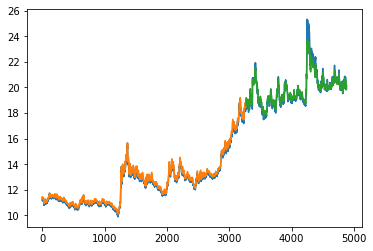

In [52]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

Hay más modificaciones a las LSTM
1. Utilizar una ventana. usar t-2,t-1,t para predecir t+1
2. Cambiar TimeStep, verlo como un mismo input y no muchos inputs. 
3. Le pueden agregar memoria entre Batches. Por default la memoria se resetea. Keras les permite dejar `stateful`, donde no se resetea y va guardando la secuencai. Para esto se debe un un loop para epochs 

# Otros ejercicios. 


# 1. Utilizando una ventana 
Usar t-2, t-1 y t para predecir t+1


In [56]:
len(train)

3270

In [57]:
len(trainX)

3267

In [58]:
trainX,trainY=create_dataset(train,look_back)
trainX.shape[1]

2

In [ ]:
#este ejercicio fue el que hicimos arriba. 

look_back=2
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)

#reshape input sea [samples,time steps,features]
#aquí le estamos dicindo que tiene 2 columnas/features para pronosticas
trainX=np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX=np.reshape(testX,(testX.shape[0],1,testX.shape[1]))


#modelo
model=Sequential()
model.add(LSTM(4,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.fit(trainX,trainY,epochs=50,batch_size=1,verbose=2)


#Hacemos predicciones
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)


#Regresar a una Escala Conocida de Tipo de Cambio
#Recordar que el modlo escaló MinMax
trainPredict=scaler.inverse_transform(trainPredict)
trainY=scaler.inverse_transform([trainY])

testPredict=scaler.inverse_transform(testPredict)
testY=scaler.inverse_transform([testY])


#Calculamos Errores
trainScore=math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore=math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


#Vamos a gaficar
trainPredictPlot=np.empty_like(dataset)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:]=trainPredict

testPredictPlot=np.empty_like(dataset)
testPredictPlot[:,:]=np.nan
testPredictPlot[(len(trainPredict)+(look_back*2)+1):len(dataset)-1,:]=testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)


# 2. Cambiando el Time Step, verlo de un mismo input y no muchos input

In [62]:
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)
trainX.shape[1]

2

In [63]:
trainX

array([[0.09641427, 0.0920186 ],
       [0.0920186 , 0.08910972],
       [0.08910972, 0.08542508],
       ...,
       [0.585286  , 0.5837424 ],
       [0.5837424 , 0.58443093],
       [0.58443093, 0.57999885]], dtype=float32)

In [60]:
#reshape input que sea [samples, time steps, features]
#Antes: rezagos eran como variables independientes
trainX=np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))


In [61]:
trainX.shape

(3267, 1, 2)

In [64]:
#ahora Una sóla variable
#con información rezagada
#reshape input que sea [samples, time steps, features]
trainX=np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX=np.reshape(testX,(testX.shape[0],testX.shape[1],1))


In [65]:
trainX.shape

(3267, 2, 1)

In [66]:
trainX

array([[[0.09641427],
        [0.0920186 ]],

       [[0.0920186 ],
        [0.08910972]],

       [[0.08910972],
        [0.08542508]],

       ...,

       [[0.585286  ],
        [0.5837424 ]],

       [[0.5837424 ],
        [0.58443093]],

       [[0.58443093],
        [0.57999885]]], dtype=float32)

Epoch 1/25
3267/3267 - 19s - loss: 0.0022
Epoch 2/25
3267/3267 - 12s - loss: 6.9189e-05
Epoch 3/25
3267/3267 - 11s - loss: 6.4341e-05
Epoch 4/25
3267/3267 - 11s - loss: 6.4073e-05
Epoch 5/25
3267/3267 - 12s - loss: 6.4375e-05
Epoch 6/25
3267/3267 - 12s - loss: 6.3060e-05
Epoch 7/25
3267/3267 - 7s - loss: 6.1509e-05
Epoch 8/25
3267/3267 - 5s - loss: 6.0719e-05
Epoch 9/25
3267/3267 - 5s - loss: 6.2978e-05
Epoch 10/25
3267/3267 - 5s - loss: 6.2283e-05
Epoch 11/25
3267/3267 - 5s - loss: 6.1645e-05
Epoch 12/25
3267/3267 - 6s - loss: 6.1104e-05
Epoch 13/25
3267/3267 - 9s - loss: 5.9734e-05
Epoch 14/25
3267/3267 - 12s - loss: 6.0122e-05
Epoch 15/25
3267/3267 - 12s - loss: 5.9342e-05
Epoch 16/25
3267/3267 - 12s - loss: 5.7734e-05
Epoch 17/25
3267/3267 - 13s - loss: 5.6825e-05
Epoch 18/25
3267/3267 - 13s - loss: 5.8484e-05
Epoch 19/25
3267/3267 - 12s - loss: 5.7153e-05
Epoch 20/25
3267/3267 - 12s - loss: 5.6998e-05
Epoch 21/25
3267/3267 - 12s - loss: 5.5180e-05
Epoch 22/25
3267/3267 - 11s - los

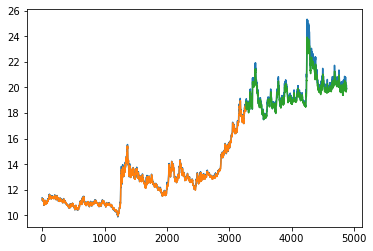

In [67]:
look_back=2
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)

#reshape input sea [samples,time steps,features]

#NUEVO NUEVO
trainX=np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX=np.reshape(testX,(testX.shape[0],testX.shape[1],1))

#modelo
model=Sequential()

#NUEVO NUEVO
model.add(LSTM(4,
               =(look_back,1)))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.fit(trainX,trainY,epochs=25,batch_size=1,verbose=2)

#Hacemos predicciones
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)


#Regresar a una Escala Conocida de Tipo de Cambio
#Recordar que el modlo escaló MinMax
trainPredict=scaler.inverse_transform(trainPredict)
trainY=scaler.inverse_transform([trainY])

testPredict=scaler.inverse_transform(testPredict)
testY=scaler.inverse_transform([testY])

#Calculamos Errores
trainScore=math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore=math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


#Vamos a gaficar
trainPredictPlot=np.empty_like(dataset)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:]=trainPredict


testPredictPlot=np.empty_like(dataset)
testPredictPlot[:,:]=np.nan
testPredictPlot[(len(trainPredict)+(look_back*2)+1):len(dataset)-1,:]=testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)


# 3. Guardar Memoria Entre Batches

Le vamos a agregar Memoria entre Batches, por default, keras resetea la memoria. 

Keras te permite dejar "stateful", crear el estado en el entrenamiento y mantenerlo si le ayuda a predecir.

Se requiere que el training no sea shuffle cuando se entrena, explíticamente resetear la red después de cada epoch

Normalmente el estado dentro de la red se resetea despued de cada Batch cuando entrena el modelo. Si lo dejas "stateful" guarda la secuencia. 

Se crea un loop para los epochs

3267/3267 - 15s - loss: 2.6895e-04
3267/3267 - 5s - loss: 3.8113e-04
3267/3267 - 5s - loss: 2.6051e-04
3267/3267 - 10s - loss: 2.0985e-04
3267/3267 - 14s - loss: 1.8029e-04
3267/3267 - 14s - loss: 1.6124e-04
3267/3267 - 9s - loss: 1.4639e-04
3267/3267 - 5s - loss: 1.3254e-04
3267/3267 - 6s - loss: 1.2158e-04
3267/3267 - 8s - loss: 1.1235e-04
3267/3267 - 12s - loss: 1.0403e-04
3267/3267 - 14s - loss: 9.6350e-05
3267/3267 - 12s - loss: 8.8634e-05
3267/3267 - 13s - loss: 8.1181e-05
3267/3267 - 11s - loss: 7.7315e-05
3267/3267 - 12s - loss: 7.5502e-05
3267/3267 - 12s - loss: 7.5307e-05
3267/3267 - 14s - loss: 7.5014e-05
3267/3267 - 13s - loss: 7.4428e-05
3267/3267 - 13s - loss: 7.3832e-05
3267/3267 - 13s - loss: 7.3354e-05
3267/3267 - 14s - loss: 7.2990e-05
3267/3267 - 13s - loss: 7.2714e-05
3267/3267 - 14s - loss: 7.2505e-05
3267/3267 - 13s - loss: 7.2351e-05
Train Score: 1.38 RMSE
Test Score: 0.50 RMSE


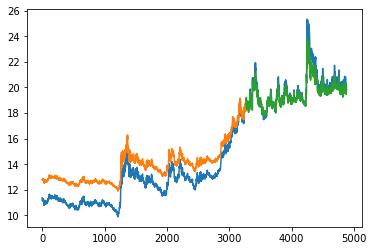

In [68]:
look_back=2
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)

#reshape input sea [samples,time steps,features]

trainX=np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX=np.reshape(testX,(testX.shape[0],testX.shape[1],1))

#modelo PARTE NUEVA
batch_size=1
model=Sequential()

model.add(LSTM(4,batch_input_shape=(batch_size,look_back,1),
               stateful=True))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")


for i in range(25):
    model.fit(trainX,trainY,epochs=1,batch_size=batch_size,verbose=2,shuffle=False)
    model.reset_states()

#Hacemos predicciones
trainPredict=model.predict(trainX,batch_size=batch_size)
testPredict=model.predict(testX,batch_size=batch_size)


#Regresar a una Escala Conocida de Tipo de Cambio
#Recordar que el modlo escaló MinMax
trainPredict=scaler.inverse_transform(trainPredict)
trainY=scaler.inverse_transform([trainY])


testPredict=scaler.inverse_transform(testPredict)
testY=scaler.inverse_transform([testY])


#Calculamos Errores
trainScore=math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))


testScore=math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


#Vamos a gaficar
trainPredictPlot=np.empty_like(dataset)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:]=trainPredict


testPredictPlot=np.empty_like(dataset)
testPredictPlot[:,:]=np.nan
testPredictPlot[(len(trainPredict)+(look_back*2)+1):len(dataset)-1,:]=testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

